# Part-1
1. What is clustering, and how does it differ from classification?
2. Explain the concept of K-Means clustering. How does the algorithm work?
3. How do we determine the optimal number of clusters in K-Means?
4. What are some real-world applications of clustering? Provide at least two examples.
5. What is the impact of feature scaling on K-Means clustering? Why is it necessary?

#1
Clustering is an unsupervised machine learning technique where data points are grouped into clusters based on similarity. The goal is to find natural groupings within the data without pre-labeled outcomes. Each cluster contains similar objects, but different clusters contain objects that are dissimilar to each other.
On the other hand, classification is a supervised learning technique where the goal is to assign predefined labels or categories to new data based on labeled training data. In classification, the algorithm learns from labeled examples and makes predictions for unseen data.
The main difference:
Clustering: Unsupervised, groups data into clusters without predefined labels.
Classification: Supervised, predicts labels for new data based on learned patterns.

#2
K-Means clustering is one of the most popular and simple clustering algorithms. It aims to partition a dataset into K clusters, where each data point belongs to the cluster with the closest mean.
Here’s how it works:
Initialization: Choose K initial centroids randomly from the dataset. These centroids represent the center of the clusters.
Assignment: Assign each data point to the nearest centroid. This forms K clusters.
Update: For each of the K clusters, recalculate the centroid as the mean of all data points in that cluster.
Repeat: Repeat the assignment and update steps until the centroids stop changing or change very little (convergence).

                                                                                                                              
#3
Determining the optimal number of clusters, K, is often a key challenge in K-Means clustering. Several methods are commonly used:
Elbow Method: This is one of the most popular approaches. You run the K-Means algorithm for different values of K (e.g., from 1 to 10) and plot the within-cluster sum of squares (WCSS) for each K. The "elbow" point in the graph, where the rate of decrease in WCSS slows down, suggests the optimal K.
Silhouette Score: The silhouette score measures how similar each point is to its own cluster compared to other clusters. A higher silhouette score indicates better-defined clusters. The optimal K is typically the one that maximizes the silhouette score.
Gap Statistic: This compares the performance of the clustering with that of a random clustering. If the gap between the observed and random clustering is large, it indicates a good choice of K.

                                                                                                                              
#4
Real-World Applications of Clustering
Customer Segmentation: Businesses often use clustering to segment their customer base into distinct groups based on purchasing behavior, demographics, or other attributes. This helps in targeting specific groups with tailored marketing strategies.
Image Compression: In image processing, clustering can be used to reduce the number of colors in an image. K-Means can be applied to cluster similar colors together, and then each cluster can be represented by a single color, thereby compressing the image.

                                        
#5
Impact of Feature Scaling on K-Means Clustering
Feature scaling is very important for K-Means clustering because the algorithm uses distance measures (such as Euclidean distance) to assign points to clusters. If the features have different scales (e.g., one feature ranges from 0 to 1, and another ranges from 1 to 1000), the distance calculation will be dominated by the feature with the larger range. This can lead to biased cluster assignments.
Why is feature scaling necessary?
Equal Weighting: Scaling ensures that all features contribute equally to the distance metric and the clustering process.
Improved Convergence: Proper scaling helps the algorithm converge faster and more reliably.
Common scaling techniques include:
Min-Max Scaling: Rescaling features to a range of [0, 1].
Standardization (Z-Score Normalization): Scaling features to have a mean of 0 and a standard deviation of 1.
In summary, feature scaling ensures that each feature has the same weight in the clustering process, leading to more accurate and meaningful clusters.

# Part-2
## Data Analysis & K-Means Clustering
### Task 1: Exploratory Data Analysis (EDA)
- Load the dataset and display the first five rows.
- Plot a scatter plot of Feature_1 vs. Feature_2 to visualize the data distribution.
- Compute basic statistical measures (mean, median, variance) for each feature.


   Feature_1  Feature_2  Cluster
0  -7.726421  -8.394957        2
1   5.453396   0.742305        1
2  -2.978672   9.556846        0
3   6.042673   0.571319        1
4  -6.521840  -6.319325        2


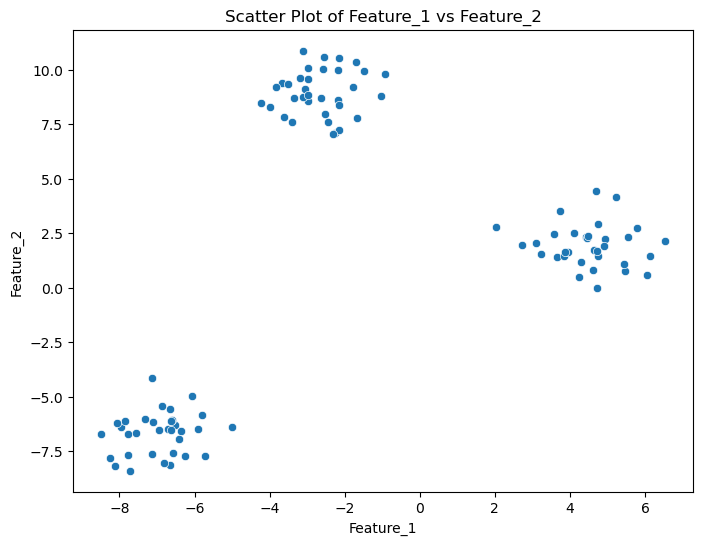


Basic Statistical Measures for the features:
        Feature_1   Feature_2     Cluster
count  100.000000  100.000000  100.000000
mean    -1.716279    1.474851    0.990000
std      4.804275    6.505181    0.822598
min     -8.487110   -8.394957    0.000000
25%     -6.435252   -6.094340    0.000000
50%     -2.603027    1.922690    1.000000
75%      3.837695    8.313123    2.000000
max      6.526065   10.866564    2.000000


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Clustering_Dataset.csv')  # Change the path if the dataset is in a different location
print(df.head())
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Feature_1', y='Feature_2', data=df)
plt.title('Scatter Plot of Feature_1 vs Feature_2')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.show()
print("\nBasic Statistical Measures for the features:")
print(df.describe())  # This gives count, mean, std, min, 25%, 50%, 75%, and max for each feature

### Task 2: Implementing K-Means Clustering
- Apply K-Means clustering on the dataset.
- Set the number of clusters (K) to 3 and fit the model.
- Assign cluster labels to each data point.
- Plot the clustered data points using different colors for each cluster.


C:\Users\dhari\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


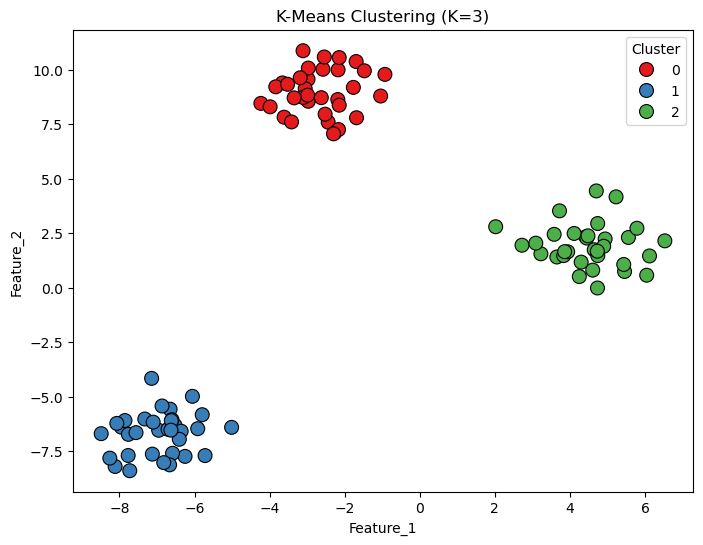

Cluster Centers (Centroids):
[[-2.66780392  8.93576069]
 [-6.95170962 -6.67621669]
 [ 4.49951001  1.93892013]]


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
df = pd.read_csv('Clustering_Dataset.csv')  # Change the path if needed
kmeans = KMeans(n_clusters=3, random_state=42)  # Setting random_state for reproducibility
df['Cluster'] = kmeans.fit_predict(df[['Feature_1', 'Feature_2']])  # Fit model and assign labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Feature_1', y='Feature_2', hue='Cluster', data=df, palette='Set1', s=100, edgecolor='black')
plt.title('K-Means Clustering (K=3)')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.legend(title='Cluster')
plt.show()
print("Cluster Centers (Centroids):")
print(kmeans.cluster_centers_)

### Task 3:Evaluating the Clustering Results
- Compute the Within-Cluster Sum of Squares (WCSS) and plot the Elbow Curve.
- Compare the generated clusters with the true labels provided in the dataset.
- Identify any potential misclassified points and discuss reasons for the misclassification.
 

C:\Users\dhari\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dhari\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dhari\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dhari\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

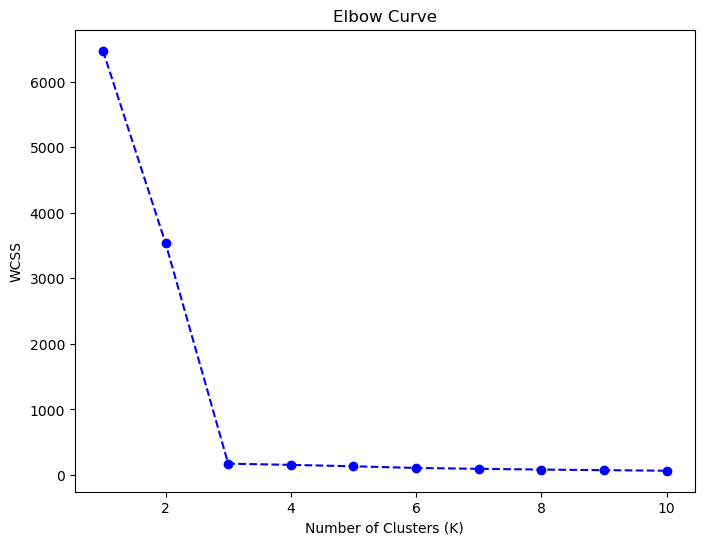

No True_Label column found in the dataset for comparison.


C:\Users\dhari\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [22]:
# Import required libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Set the environment variable to avoid memory leak warning in Windows
os.environ['OMP_NUM_THREADS'] = '1'
# Load the dataset
df = pd.read_csv('Clustering_Dataset.csv')  # Update the file path if needed
# Compute the Within-Cluster Sum of Squares (WCSS) for different values of K
wcss = []
for k in range(1, 11):  # Test for K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['Feature_1', 'Feature_2']])
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS for the model
# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()
# Apply K-Means clustering with the optimal K (K=3 in our case based on previous steps)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Feature_1', 'Feature_2']])
# If the dataset contains true labels (e.g., 'True_Label'), compare the clusters with the true labels
# (Assuming the dataset has a 'True_Label' column for comparison purposes)
if 'True_Label' in df.columns:
    from sklearn.metrics import confusion_matrix
    # Print confusion matrix
    cm = confusion_matrix(df['True_Label'], df['Cluster'])
    print("Confusion Matrix:")
    print(cm)
    
    # Compare clusters and true labels
    print("\nCluster vs True Label Distribution:")
    print(pd.crosstab(df['True_Label'], df['Cluster']))

    # Identifying misclassified points
    misclassified = df[df['True_Label'] != df['Cluster']]
    print(f"\nMisclassified Points:\n{misclassified[['Feature_1', 'Feature_2', 'True_Label', 'Cluster']]}")
    
else:
    print("No True_Label column found in the dataset for comparison.")


## Task 4: Discussion & Reflection
- What did you observe from the Elbow Curve? How did it help in choosing K?
- Did the clustering algorithm correctly separate the natural clusters in the dataset? Why or why   not?
- What happens if we increase K beyond the optimal value? How does it affect the clusters?
- What are some of the limitations of K-Means clustering?
- Suggest any two improvements that could enhance the clustering performance.


#1
Observation from the Elbow Curve:
The Elbow Curve typically shows the relationship between the number of clusters (K) and the Within-Cluster Sum of Squares (WCSS). The WCSS decreases as K increases, since more clusters naturally result in smaller, more compact clusters.
Elbow Point: At some point, the rate of decrease in WCSS starts to slow down, which is commonly referred to as the elbow. This "elbow" is a critical indicator of the optimal number of clusters (K).
Choosing K: In most cases, the elbow point represents the optimal K. For instance, if the Elbow Curve flattens significantly after K=3, then K=3 is likely the best choice because adding more clusters doesn’t provide a substantial improvement in clustering quality.

#2
Correct Separation?:
Yes, if the Elbow Curve indicated a clear K (say K=3), and after applying K-Means, the resulting clusters are meaningful and separate the data well. You would typically expect distinct groups with minimal overlap if the data has well-defined clusters.
No, if the clusters are not distinct or the resulting cluster distribution does not align with any natural structure in the data, then K-Means might not have performed well.
Factors affecting whether clustering is successful:
Data Characteristics: If the dataset has inherent noise, outliers, or overlapping clusters, K-Means might struggle.
Feature Scaling: Features that have very different scales (e.g., one feature in range [0, 1] and another in range [1000, 10000]) can distort clustering because K-Means relies on Euclidean distance, which is sensitive to the scale of the data.
Initial Centroids: K-Means is sensitive to the initial placement of centroids. If the centroids are placed poorly, the algorithm might converge to suboptimal clusters.

#3
Increasing K beyond the optimal value:
More clusters: As you increase K, the algorithm will create more clusters. While the WCSS continues to decrease, it doesn't necessarily mean that the clustering is better.
Overfitting: Increasing K too much can lead to overfitting, where the clusters become overly specific and start to capture noise or small variations in the data, rather than actual meaningful structures.
Smaller Clusters: With too many clusters, you might end up with very small clusters, some of which might not represent significant patterns in the data.
Less Generalization: The model starts to overfit to the data and doesn't generalize well, leading to potentially less useful results when predicting unseen data.


#4
Sensitivity to Initial Centroids: K-Means can converge to a suboptimal solution if the initial centroids are poorly chosen. This can result in clusters that don’t accurately reflect the underlying data structure.
Requires Predefined K: K-Means requires the user to specify the number of clusters (K) in advance. If K is not chosen correctly, the clustering result might not reflect the true structure of the data.
Assumption of Spherical Clusters: K-Means assumes that clusters are spherical and equally sized, meaning it struggles with datasets where clusters are of varying shapes and densities.
Sensitive to Outliers: K-Means is sensitive to outliers because the algorithm minimizes squared Euclidean distance, which can be heavily influenced by extreme values.
Scalability Issues with High-Dimensional Data: K-Means can struggle to scale effectively with high-dimensional data (many features), as the notion of "distance" becomes less meaningful in high-dimensional space.


#5
1. Use of K-Means++ for Initial Centroid Selection:
K-Means++ improves upon the standard K-Means initialization by selecting the initial centroids in a smarter way. Instead of picking centroids randomly, it ensures that initial centroids are spread out across the dataset. This approach helps reduce the chances of poor initial centroids and leads to better clustering results, as it minimizes the risk of converging to suboptimal solutions.
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
2. Feature Scaling and Preprocessing:
To improve clustering performance, especially when the data features are on different scales, feature scaling should be applied. Scaling methods such as Standardization (Z-score normalization) or Min-Max scaling can ensure that all features contribute equally to the distance metric.
PCA (Principal Component Analysis) or t-SNE could also be used for dimensionality reduction, allowing the model to focus on the most informative features and reducing noise from irrelevant features.
Example of standardization:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Feature_1', 'Feature_2']] = scaler.fit_transform(df[['Feature_1', 'Feature_2']])